In [33]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
# load data
data=pd.read_csv('OH-methanol_kT_data_csv.csv')
data

,"Temperature, T (Kelvin)","Rate constant, k (cm^3 mol^-1 s^-1)",1/T,ln(k/(T^2.72))
0,240.0,6.570000e-13,0.004167,-42.958430
1,296.0,8.610000e-13,0.003378,-43.258460
2,350.0,1.250000e-12,0.002857,-43.341456
3,400.0,1.410000e-12,0.002500,-43.584215
4,440.0,1.620000e-12,0.002273,-43.704622
...,...,...,...,...
86,465.0,1.350000e-12,0.002151,-44.037258
87,570.0,2.060000e-12,0.001754,-44.168446
88,597.0,2.670000e-12,0.001675,-44.034957
89,669.0,2.790000e-12,0.001495,-44.300712


In [35]:
# load feature variable x and target variable y
X_series = data.iloc[:,2]
y_series = data.iloc[:,3]
X = np.array(X_series)
y = np.array(y_series)

# show variable shapes
print(f'X.shape {X.shape}   y.shape {y.shape}')

X.shape (91,)   y.shape (91,)


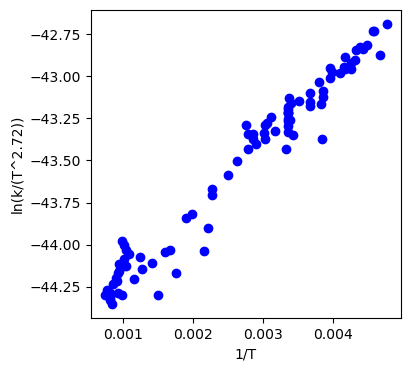

In [36]:
# plot data sets
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_xlabel('1/T')
ax.set_ylabel('ln(k/(T^2.72))')
ax.scatter(X,y,color = 'blue', label='train')
plt.show()

Linear Regression using Sklearn library

In [37]:
# Linear Regression model
model = LinearRegression()

# convert X to a 2-D matrix
model.fit(X.reshape(-1,1),y)

LinearRegression()

In [38]:
# print parameters
w = model.coef_
b = model.intercept_
print(f'slope = {w}, intercept = {b}')

slope = [396.29602168], intercept = -44.58845794879121


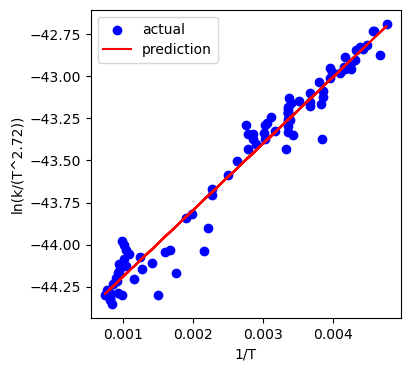

In [39]:
# make predictions
y_pred = w*X + b

# plot results
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_xlabel('1/T')
ax.set_ylabel('ln(k/(T^2.72))')
ax.scatter(X,y,color = 'blue', label='actual')
ax.plot(X,y_pred, color='red', label='prediction')
ax.legend(loc='upper left')
plt.show()

In [40]:
# calculate error
loss = mean_squared_error(y, y_pred)
print(f'loss: {loss}')

loss: 0.009653962645394316


Linear Regression from scratch using Gradient Descent